# Model Linearity

The model linearity module in alibi aims to provide a metric to measure how linear is a ML model. Linearity is defined based on how much the linear superposition of the model's outputs differs from the output of the same linear superposition of the inputs. 

Given two inputs vectors $v$, $v^\prime$ and a predict function $\text{M}(v) = out$, the linearity of the predict function is defined as

$$L = \Big|\Big|\sum_i \alpha_i \cdot \text{M}(v_i) - \text{M}\Big(\sum_i \alpha \cdot v_i\Big) \Big|\Big|^2$$

If M is a regressor and as

$$L = \Big|\Big|\sum_i \alpha_i \cdot \log[\text{M}(v_i)] - \log\Big[\text{M}\Big(\sum_i \alpha \cdot v_i\Big)\Big] \Big|\Big|^2$$

if M is a classifier.



In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from itertools import product
from alibi.confidence.model_linearity import linearity_measure, LinearityMeasure

Using TensorFlow backend.


# Dataset

In [2]:
ds = load_iris()
X_train, y_train = ds.data[:, :2], ds.target

# Models

In [3]:
lr = LogisticRegression(fit_intercept=False, multi_class='multinomial', solver='newton-cg')
rf = RandomForestClassifier(n_estimators=10)
xgb = XGBClassifier()
svm = SVC(gamma=.1, kernel='rbf', probability=True)

In [4]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Decision boundaries and linearity 

### Logistic regression

In [5]:
# Creating grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [6]:
lm = LinearityMeasure()
lm.fit(X_train)

In [7]:
clf = xgb
predict_fn = lambda x: clf.predict_proba(x)

In [22]:
features_range = [[0, 5] for _ in range(X_train.shape[1])]

In [23]:
linearity_measure(predict_fn, np.array([xx[i,j], yy[i,j]]).reshape(1, -1), features_range=features_range)

time stacking 0.0008530616760253906
v2class
predict time 0.000997304916381836


0.2361438274383545

In [9]:
L = np.empty(shape=(xx.shape[0], xx.shape[1]))
count = 0
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        if count % 1000 == 0:
            print('point ', count)
        idx = (i * xx.shape[1]) + j
        L[i, j] = lm.linearity_measure(predict_fn, np.array([xx[i,j], yy[i,j]]).reshape(1, -1))
        count += 1

point  0
v2800A
time stacking 0.0003986358642578125
v2class
predict time 0.0007038116455078125
v2800A
time stacking 0.00032711029052734375
v2class
predict time 0.00048804283142089844
v2800A
time stacking 0.00040984153747558594
v2class
predict time 0.0005004405975341797
v2800A
time stacking 0.0003094673156738281
v2class
predict time 0.00040221214294433594
v2800A
time stacking 0.0002510547637939453
v2class
predict time 0.00040268898010253906
v2800A
time stacking 0.00032591819763183594
v2class
predict time 0.0003764629364013672
v2800A
time stacking 0.0002090930938720703
v2class
predict time 0.000431060791015625
v2800A
time stacking 0.0003218650817871094
v2class
predict time 0.00035858154296875
v2800A
time stacking 0.0002923011779785156
v2class
predict time 0.0003628730773925781
v2800A
time stacking 0.00029921531677246094
v2class
predict time 0.00045013427734375
v2800A
time stacking 0.00045680999755859375
v2class
predict time 0.0004985332489013672
v2800A
time stacking 0.0002877712249755859

time stacking 0.00029540061950683594
v2class
predict time 0.0003476142883300781
v2800A
time stacking 0.0003452301025390625
v2class
predict time 0.00035262107849121094
v2800A
time stacking 0.0003349781036376953
v2class
predict time 0.0003027915954589844
v2800A
time stacking 0.0003502368927001953
v2class
predict time 0.0003230571746826172
v2800A
time stacking 0.00036025047302246094
v2class
predict time 0.0003178119659423828
v2800A
time stacking 0.0004265308380126953
v2class
predict time 0.0002930164337158203
v2800A
time stacking 0.0003991127014160156
v2class
predict time 0.0002562999725341797
v2800A
time stacking 0.0004496574401855469
v2class
predict time 0.0002567768096923828
v2800A
time stacking 0.00029587745666503906
v2class
predict time 0.00028014183044433594
v2800A
time stacking 0.00034546852111816406
v2class
predict time 0.00030159950256347656
v2800A
time stacking 0.00025177001953125
v2class
predict time 0.0002300739288330078
v2800A
time stacking 0.0003018379211425781
v2class
predi

v2800A
time stacking 0.0002579689025878906
v2class
predict time 0.00023698806762695312
v2800A
time stacking 0.00028395652770996094
v2class
predict time 0.00023627281188964844
v2800A
time stacking 0.00014138221740722656
v2class
predict time 0.00033855438232421875
v2800A
time stacking 0.0003592967987060547
v2class
predict time 0.0004477500915527344
v2800A
time stacking 0.00018477439880371094
v2class
predict time 0.0004150867462158203
v2800A
time stacking 0.0001480579376220703
v2class
predict time 0.00023818016052246094
v2800A
time stacking 0.00026917457580566406
v2class
predict time 0.0002732276916503906
v2800A
time stacking 0.00015687942504882812
v2class
predict time 0.0003314018249511719
v2800A
time stacking 0.00023698806762695312
v2class
predict time 0.00033974647521972656
v2800A
time stacking 0.00019121170043945312
v2class
predict time 0.0003020763397216797
v2800A
time stacking 0.00018858909606933594
v2class
predict time 0.00032019615173339844
v2800A
time stacking 0.00016951560974121

predict time 0.00026226043701171875
v2800A
time stacking 0.00028586387634277344
v2class
predict time 0.00020360946655273438
v2800A
time stacking 0.0003066062927246094
v2class
predict time 0.00025653839111328125
v2800A
time stacking 0.0003490447998046875
v2class
predict time 0.0004355907440185547
v2800A
time stacking 0.00024366378784179688
v2class
predict time 0.00030612945556640625
v2800A
time stacking 0.00023865699768066406
v2class
predict time 0.00029659271240234375
v2800A
time stacking 0.0002505779266357422
v2class
predict time 0.0003085136413574219
v2800A
time stacking 0.0002448558807373047
v2class
predict time 0.00030159950256347656
v2800A
time stacking 0.00024771690368652344
v2class
predict time 0.000301361083984375
v2800A
time stacking 0.0002567768096923828
v2class
predict time 0.00029349327087402344
v2800A
time stacking 0.0002472400665283203
v2class
predict time 0.0002682209014892578
v2800A
time stacking 0.00024700164794921875
v2class
predict time 0.0002951622009277344
v2800A
t

time stacking 0.00037741661071777344
v2class
predict time 0.0006604194641113281
v2800A
time stacking 0.00017523765563964844
v2class
predict time 0.00022149085998535156
v2800A
time stacking 0.0003757476806640625
v2class
predict time 0.0003085136413574219
v2800A
time stacking 0.0001628398895263672
v2class
predict time 0.0002837181091308594
v2800A
time stacking 0.00014138221740722656
v2class
predict time 0.0003261566162109375
v2800A
time stacking 0.0001595020294189453
v2class
predict time 0.00027251243591308594
v2800A
time stacking 0.00015616416931152344
v2class
predict time 0.0002694129943847656
v2800A
time stacking 0.0001556873321533203
v2class
predict time 0.0002765655517578125
v2800A
time stacking 0.00017523765563964844
v2class
predict time 0.0002753734588623047
v2800A
time stacking 0.00016999244689941406
v2class
predict time 0.0002722740173339844
v2800A
time stacking 0.00017189979553222656
v2class
predict time 0.0002758502960205078
v2800A
time stacking 0.00016880035400390625
v2class


time stacking 0.0005142688751220703
v2class
predict time 0.0002536773681640625
v2800A
time stacking 0.0003540515899658203
v2class
predict time 0.0002474784851074219
v2800A
time stacking 0.000240325927734375
v2class
predict time 0.00024056434631347656
v2800A
time stacking 0.0001723766326904297
v2class
predict time 0.000247955322265625
v2800A
time stacking 0.00013589859008789062
v2class
predict time 0.00024771690368652344
v2800A
time stacking 0.0001404285430908203
v2class
predict time 0.00024390220642089844
v2800A
time stacking 0.0001513957977294922
v2class
predict time 0.00024819374084472656
v2800A
time stacking 0.00014662742614746094
v2class
predict time 0.0002446174621582031
v2800A
time stacking 0.00013875961303710938
v2class
predict time 0.00024271011352539062
v2800A
time stacking 0.0001571178436279297
v2class
predict time 0.00032019615173339844
v2800A
time stacking 0.00015735626220703125
v2class
predict time 0.00024175643920898438
v2800A
time stacking 0.00015044212341308594
v2class


predict time 0.00035309791564941406
v2800A
time stacking 0.00019693374633789062
v2class
predict time 0.00024056434631347656
v2800A
time stacking 0.0002262592315673828
v2class
predict time 0.00035834312438964844
v2800A
time stacking 0.00027370452880859375
v2class
predict time 0.0002796649932861328
v2800A
time stacking 0.000141143798828125
v2class
predict time 0.00025391578674316406
v2800A
time stacking 7.43865966796875e-05
v2class
predict time 0.000274658203125
v2800A
time stacking 7.343292236328125e-05
v2class
predict time 0.0003306865692138672
v2800A
time stacking 7.510185241699219e-05
v2class
predict time 0.000324249267578125
v2800A
time stacking 8.58306884765625e-05
v2class
predict time 0.0003604888916015625
v2800A
time stacking 7.534027099609375e-05
v2class
predict time 0.0003304481506347656
v2800A
time stacking 0.00013208389282226562
v2class
predict time 0.0002644062042236328
v2800A
time stacking 8.082389831542969e-05
v2class
predict time 0.0003750324249267578
v2800A
time stacking

time stacking 0.000213623046875
v2class
predict time 0.0003426074981689453
v2800A
time stacking 0.0010938644409179688
v2class
predict time 0.0004405975341796875
v2800A
time stacking 0.000400543212890625
v2class
predict time 0.0004487037658691406
v2800A
time stacking 0.00032329559326171875
v2class
predict time 0.0008363723754882812
v2800A
time stacking 0.0002853870391845703
v2class
predict time 0.00043082237243652344
v2800A
time stacking 0.00030517578125
v2class
predict time 0.00033283233642578125
v2800A
time stacking 0.0002567768096923828
v2class
predict time 0.0002608299255371094
v2800A
time stacking 0.0002434253692626953
v2class
predict time 0.0003132820129394531
v2800A
time stacking 0.00025272369384765625
v2class
predict time 0.00032329559326171875
v2800A
time stacking 0.0003190040588378906
v2class
predict time 0.0003650188446044922
v2800A
time stacking 0.00030732154846191406
v2class
predict time 0.0005133152008056641
v2800A
time stacking 0.0004241466522216797
v2class
predict time 0

time stacking 0.00020432472229003906
v2class
predict time 0.0003857612609863281
v2800A
time stacking 0.0002655982971191406
v2class
predict time 0.00038504600524902344
v2800A
time stacking 0.00012564659118652344
v2class
predict time 0.00026988983154296875
v2800A
time stacking 0.00017404556274414062
v2class
predict time 0.0002465248107910156
v2800A
time stacking 0.00016689300537109375
v2class
predict time 0.0002391338348388672
v2800A
time stacking 0.00016069412231445312
v2class
predict time 0.0002722740173339844
v2800A
time stacking 0.00017070770263671875
v2class
predict time 0.0002696514129638672
v2800A
time stacking 0.0001666545867919922
v2class
predict time 0.00026726722717285156
v2800A
time stacking 0.00015616416931152344
v2class
predict time 0.0002713203430175781
v2800A
time stacking 0.00017499923706054688
v2class
predict time 0.0002713203430175781
v2800A
time stacking 0.00016069412231445312
v2class
predict time 0.0002295970916748047
v2800A
time stacking 0.00016069412231445312
v2cla

predict time 0.00021076202392578125
v2800A
time stacking 0.0001323223114013672
v2class
predict time 0.0002589225769042969
v2800A
time stacking 0.00012111663818359375
v2class
predict time 0.00030112266540527344
v2800A
time stacking 7.867813110351562e-05
v2class
predict time 0.0003437995910644531
v2800A
time stacking 0.000152587890625
v2class
predict time 0.00033545494079589844
v2800A
time stacking 0.00022792816162109375
v2class
predict time 0.0003337860107421875
v2800A
time stacking 0.00020265579223632812
v2class
predict time 0.0002989768981933594
v2800A
time stacking 0.00028324127197265625
v2class
predict time 0.00030422210693359375
v2800A
time stacking 0.00032019615173339844
v2class
predict time 0.00025916099548339844
v2800A
time stacking 0.00021219253540039062
v2class
predict time 0.00027823448181152344
v2800A
time stacking 5.459785461425781e-05
v2class
predict time 0.00023674964904785156
v2800A
time stacking 0.00011873245239257812
v2class
predict time 0.0003159046173095703
v2800A
ti

time stacking 0.00016617774963378906
v2class
predict time 0.0015854835510253906
v2800A
time stacking 0.0002944469451904297
v2class
predict time 0.0004565715789794922
v2800A
time stacking 0.0004336833953857422
v2class
predict time 0.0007007122039794922
v2800A
time stacking 0.00042724609375
v2class
predict time 0.0004324913024902344
v2800A
time stacking 0.00029206275939941406
v2class
predict time 0.0003809928894042969
v2800A
time stacking 0.0027208328247070312
v2class
predict time 0.0008215904235839844
v2800A
time stacking 0.0005040168762207031
v2class
predict time 0.0011622905731201172
v2800A
time stacking 0.00047469139099121094
v2class
predict time 0.00040650367736816406
v2800A
time stacking 0.00046372413635253906
v2class
predict time 0.0005469322204589844
v2800A
time stacking 0.0006356239318847656
v2class
predict time 0.00041484832763671875
v2800A
time stacking 0.0004210472106933594
v2class
predict time 0.0005037784576416016
v2800A
time stacking 0.0003497600555419922
v2class
predict t

time stacking 0.0003695487976074219
v2class
predict time 0.0002541542053222656
v2800A
time stacking 0.0001761913299560547
v2class
predict time 0.0002639293670654297
v2800A
time stacking 0.00022912025451660156
v2class
predict time 0.0002541542053222656
v2800A
time stacking 0.00018477439880371094
v2class
predict time 0.00030493736267089844
v2800A
time stacking 0.00014710426330566406
v2class
predict time 0.0002796649932861328
v2800A
time stacking 0.0001595020294189453
v2class
predict time 0.0003387928009033203
v2800A
time stacking 0.00014853477478027344
v2class
predict time 0.0003101825714111328
v2800A
time stacking 0.0001838207244873047
v2class
predict time 0.00023365020751953125
v2800A
time stacking 0.00018453598022460938
v2class
predict time 0.00023412704467773438
v2800A
time stacking 0.00011014938354492188
v2class
predict time 0.00023412704467773438
v2800A
time stacking 0.0001399517059326172
v2class
predict time 0.00031685829162597656
v2800A
time stacking 0.00018405914306640625
v2clas

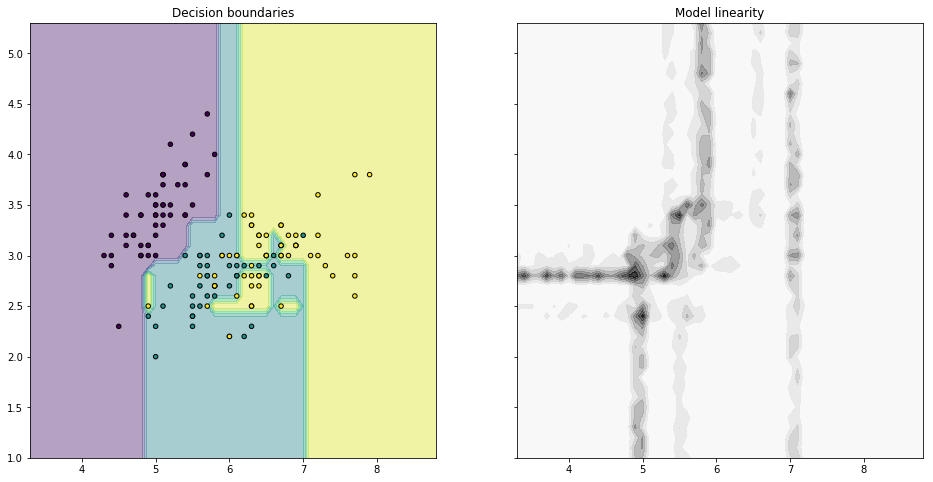

In [10]:
f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16, 8))
idx = (0,0)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr[0].contourf(xx, yy, Z, alpha=0.4)
axarr[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k', alpha=1)
axarr[0].set_title('Decision boundaries')

#axarr[1].contourf(xx, yy, Z, alpha=0.4)
#axarr[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k',alpha=1)
axarr[1].contourf(xx, yy, L, alpha=0.8, cmap='Greys')
axarr[1].set_title('Model linearity')
plt.show()

In [51]:
L.max()

1.0027235056428858